Base de Dados: ENADE 2018 e 2019

Objetivo: Analisar a influencia de características como cor da pele, escolaridade da mãe, renda familiar e tipo de escola que cursou o ensino médio na nota geral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#QE_I02 --> cor/raça
       A = Branca.
       B = Preta.
       C = Amarela.
       D = Parda.
       E = Indígena.
       F = Não quero declarar.
       
#QE_I05 -->Escolaridade da mãe
      A = Nenhuma.
      B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).
      C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).
      D = Ensino médio.
      E = Ensino Superior - Graduação.
      F = Pós-graduação.
      
#QE_I08 --> Renda Familiar
    A = Até 1,5 salário mínimo (até R$ 1.431,00).
    B = De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00).
    C = De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00).
    D = De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00).
    E = De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00).
    F = De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00).
    G = Acima de 30 salários mínimos (mais de R$ 28.620,00).

#QE_I17 --> Tipo de escola que cursou o Ensino Médio
    A = Todo em escola pública.
    B = Todo em escola privada (particular).
    C = Todo no exterior.
    D = A maior parte em escola pública.
    E = A maior parte em escola privada (particular).
    F = Parte no Brasil e parte no exterior.





In [83]:
#QE_I02 --> cor/raça
#QE_I05 -->Escolaridade da mãe
#QE_I08 --> Renda Familiar
#QE_I17 --> Tipo de escola que cursou o Ensino Médio
#NT_GER --> Nota Geral
#NT_FG  --> Nota bruta na formação geral 
#NT_OBJ_FG --> Nota bruta na parte objetiva da formação geral.




enade2019= pd.read_csv("microdados_enade_2019.txt", sep=';',dtype={"QE_I02": 'category', 
                                                                               'QE_I05':'category',
                                                                              'QE_I08':'category',
                                                                              'QE_I17':'category',
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                               })


enade2019.shape



c:\users\debora\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(433930, 137)

In [84]:
enade2019['QE_I02 - Grupos Cor Pele'] = enade2019['QE_I02'].cat.codes
enade2019['QE_I05 - Grupos Escolaridade Mae'] = enade2019['QE_I05'].cat.codes
enade2019['QE_I08 - Grupos Renda Familiar'] = enade2019['QE_I08'].cat.codes
enade2019['QE_I17 - Grupos Tipo Escola E.M'] = enade2019['QE_I17'].cat.codes





In [97]:
tabela = pd.DataFrame(enade2019, columns=['QE_I05 - Grupos Escolaridade Mae','QE_I02 - Grupos Cor Pele','QE_I17 - Grupos Tipo Escola E.M','QE_I08 - Grupos Renda Familiar',
                                          'QE_I02', 'QE_I05', 'QE_I08','QE_I17', 'NT_GER'])
tabela.head(10)



,QE_I05 - Grupos Escolaridade Mae,QE_I02 - Grupos Cor Pele,QE_I17 - Grupos Tipo Escola E.M,QE_I08 - Grupos Renda Familiar,QE_I02,QE_I05,QE_I08,QE_I17,NT_GER
0,5,3,2,2,C,E,B,B,"51,9"
1,4,1,2,5,A,D,E,B,"54,2"
2,5,1,1,5,A,E,E,A,NaN
3,6,4,2,5,D,F,E,B,"42,1"
4,0,0,0,0,,,,,NaN
5,5,1,2,3,A,E,C,B,"49,3"
6,5,1,2,5,A,E,E,B,"49,6"
7,5,1,2,4,A,E,D,B,"43,6"
8,6,1,2,5,A,F,E,B,"55,3"
9,6,2,1,4,B,F,D,A,"61,6"


In [98]:
from collections import Counter
Counter(tabela['QE_I02']).values()

Counter(tabela['QE_I02']).keys()

dict_keys(['C', 'A', 'D', ' ', 'B', 'F', 'E'])

In [99]:
#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
tabela=tabela.loc[(tabela['QE_I02'].notnull())]



tabela['NT_GER'].dropna(how='any')

tabela=tabela.loc[(tabela['QE_I02 - Grupos Cor Pele'].notnull())]
tabela['QE_I02 - Grupos Cor Pele'].dropna(how='any')
tabela['QE_I02'].dropna(how='any')

tabela.drop(tabela.loc[tabela['QE_I02']==' '].index, inplace=True)
tabela.drop(tabela.loc[tabela['QE_I02 - Grupos Cor Pele']==' '].index, inplace=True)



#converte de str para float
tabela['NT_GER'] = pd.to_numeric(tabela['NT_GER'])
print(tabela['NT_GER'])
#media das notas gerais
print(tabela['NT_GER'].mean())


0         51.9
1         54.2
3         42.1
5         49.3
6         49.6
          ... 
433925    37.7
433926    56.0
433927    39.4
433928    53.9
433929    57.7
Name: NT_GER, Length: 389458, dtype: float64
44.092243579538746


In [73]:
tabela.head(10)

,QE_I02 - Grupos Cor Pele,QE_I17 - Grupos Tipo Escola E.M,QE_I02,QE_I05,QE_I08,QE_I17,NT_GER
0,3,2,C,E,B,B,51.9
1,1,2,A,D,E,B,54.2
3,4,2,D,F,E,B,42.1
5,1,2,A,E,C,B,49.3
6,1,2,A,E,E,B,49.6
7,1,2,A,E,D,B,43.6
8,1,2,A,F,E,B,55.3
9,2,1,B,F,D,A,61.6
10,1,5,A,E,F,E,55.1
11,4,1,D,D,B,A,49.5


In [8]:
from collections import Counter
Counter(tabela['QE_I02']).values()
Counter(tabela['QE_I02']).keys()



dict_keys(['C', 'A', 'D', 'B', 'F', 'E'])

In [9]:
Counter(tabela['QE_I02 - Grupos Cor Pele']).values()
Counter(tabela['QE_I02 - Grupos Cor Pele']).keys()


dict_keys([3, 1, 4, 2, 6, 5])

In [10]:
tabela['QE_I02'].value_counts()


A    210805
D    129547
B     31273
C      9592
F      7022
E      1219
          0
Name: QE_I02, dtype: int64

In [11]:
tabela.head(10)

,QE_I02 - Grupos Cor Pele,QE_I02,QE_I05,QE_I08,QE_I17,NT_GER
0,3,C,E,B,B,51.9
1,1,A,D,E,B,54.2
3,4,D,F,E,B,42.1
5,1,A,E,C,B,49.3
6,1,A,E,E,B,49.6
7,1,A,E,D,B,43.6
8,1,A,F,E,B,55.3
9,2,B,F,D,A,61.6
10,1,A,E,F,E,55.1
11,4,D,D,B,A,49.5


In [12]:
tabela['QE_I02 - Grupos Cor Pele'].value_counts()




1    210805
4    129547
2     31273
3      9592
6      7022
5      1219
Name: QE_I02 - Grupos Cor Pele, dtype: int64

In [13]:
negros = tabela[tabela['QE_I02'] == 'B']
print(negros)
negros.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
9                              2      B      F      D      A    61.6
47                             2      B      E      C      B    52.5
63                             2      B      F      D      B    62.7
75                             2      B      D      C      A    49.5
78                             2      B      E      F      E    60.1
...                          ...    ...    ...    ...    ...     ...
433862                         2      B      D      A      A    47.2
433874                         2      B      F      D      A    41.8
433875                         2      B      D      B      A    33.5
433876                         2      B      C      C      D    68.8
433907                         2      B      D      C      D    38.6

[31273 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,31273.0,31273.000000
mean,2.0,41.324619
std,0.0,14.147008
min,2.0,0.000000
25%,2.0,30.800000
50%,2.0,40.700000
75%,2.0,51.400000
max,2.0,93.000000


In [14]:
brancos = tabela[tabela['QE_I02'] == 'A']
print(brancos)
brancos.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
1                              1      A      D      E      B    54.2
5                              1      A      E      C      B    49.3
6                              1      A      E      E      B    49.6
7                              1      A      E      D      B    43.6
8                              1      A      F      E      B    55.3
...                          ...    ...    ...    ...    ...     ...
433924                         1      A      B      D      A    63.5
433926                         1      A      D      E      A    56.0
433927                         1      A      D      E      A    39.4
433928                         1      A      B      D      A    53.9
433929                         1      A      B      D      A    57.7

[210805 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,210805.0,210805.000000
mean,1.0,45.709632
std,0.0,14.463085
min,1.0,0.000000
25%,1.0,35.000000
50%,1.0,45.700000
75%,1.0,56.400000
max,1.0,91.600000


In [15]:
pardos = tabela[tabela['QE_I02'] == 'D']
print(pardos)
pardos.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
3                              4      D      F      E      B    42.1
11                             4      D      D      B      A    49.5
12                             4      D      B      C      A    76.8
14                             4      D      F      B      A    44.1
16                             4      D      B      E      A    38.8
...                          ...    ...    ...    ...    ...     ...
433898                         4      D      F      F      B    70.2
433904                         4      D      E      F      B    67.5
433909                         4      D      D      B      E    59.3
433913                         4      D      A      B      A    37.0
433925                         4      D      B      C      A    37.7

[129547 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,129547.0,129547.000000
mean,4.0,42.107826
std,0.0,14.371268
min,4.0,0.000000
25%,4.0,31.300000
50%,4.0,41.500000
75%,4.0,52.500000
max,4.0,91.600000


In [16]:
ecolaridadeMaeNenhuma = tabela[tabela['QE_I05'] == 'A']
print(ecolaridadeMaeNenhuma)
ecolaridadeMaeNenhuma.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
51                             4      D      A      D      A    45.1
143                            4      D      A      A      A    60.7
455                            4      D      A      F      A    59.4
1154                           2      B      A      C      A    44.0
1162                           2      B      A      A      A    57.1
...                          ...    ...    ...    ...    ...     ...
433696                         4      D      A      C      D    29.4
433723                         4      D      A      B      A    38.9
433810                         1      A      A      C      A    36.3
433816                         1      A      A      B      A    30.7
433913                         4      D      A      B      A    37.0

[8817 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,8817.000000,8817.000000
mean,2.746172,37.126710
std,1.424839,13.623026
min,1.000000,0.000000
25%,1.000000,27.000000
50%,4.000000,36.100000
75%,4.000000,46.300000
max,6.000000,84.200000


In [17]:
ecolaridadeMaePos = tabela[tabela['QE_I05'] == 'F']
print(ecolaridadeMaePos)
ecolaridadeMaePos.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
3                              4      D      F      E      B    42.1
8                              1      A      F      E      B    55.3
9                              2      B      F      D      A    61.6
14                             4      D      F      B      A    44.1
18                             4      D      F      F      A    26.6
...                          ...    ...    ...    ...    ...     ...
433867                         1      A      F      E      B    71.2
433871                         1      A      F      E      B    64.4
433874                         2      B      F      D      A    41.8
433894                         1      A      F      F      B    61.1
433898                         4      D      F      F      B    70.2

[45581 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,45581.000000,45581.000000
mean,2.013120,48.736237
std,1.449381,14.591306
min,1.000000,0.000000
25%,1.000000,38.200000
50%,1.000000,49.300000
75%,4.000000,59.700000
max,6.000000,91.600000


In [18]:
estudouEscPublica = tabela[tabela['QE_I17'] == 'A']
print(estudouEscPublica)
estudouEscPublica.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
9                              2      B      F      D      A    61.6
11                             4      D      D      B      A    49.5
12                             4      D      B      C      A    76.8
13                             1      A      E      B      A    70.2
14                             4      D      F      B      A    44.1
...                          ...    ...    ...    ...    ...     ...
433925                         4      D      B      C      A    37.7
433926                         1      A      D      E      A    56.0
433927                         1      A      D      E      A    39.4
433928                         1      A      B      D      A    53.9
433929                         1      A      B      D      A    57.7

[233552 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,233552.000000,233552.000000
mean,2.387884,41.836099
std,1.472665,14.059969
min,1.000000,0.000000
25%,1.000000,31.400000
50%,2.000000,41.300000
75%,4.000000,51.800000
max,6.000000,91.600000


In [19]:
estudouEscParticular = tabela[tabela['QE_I17'] == 'B']
print(estudouEscParticular)
estudouEscParticular.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
0                              3      C      E      B      B    51.9
1                              1      A      D      E      B    54.2
3                              4      D      F      E      B    42.1
5                              1      A      E      C      B    49.3
6                              1      A      E      E      B    49.6
...                          ...    ...    ...    ...    ...     ...
433898                         4      D      F      F      B    70.2
433899                         1      A      E      E      B    48.2
433902                         1      A      D      E      B    43.2
433904                         4      D      E      F      B    67.5
433911                         6      F      B      D      B    57.5

[122694 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,122694.000000,122694.000000
mean,1.937756,48.902343
std,1.414812,14.352335
min,1.000000,0.000000
25%,1.000000,38.600000
50%,1.000000,49.600000
75%,4.000000,59.700000
max,6.000000,93.000000


In [20]:
estudouExterior = tabela[tabela['QE_I17'] == 'C']
print(estudouExterior)
estudouExterior.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
628                            1      A      F      F      C    37.8
998                            4      D      D      B      C    48.6
1592                           4      D      D      C      C    24.8
1682                           4      D      F      F      C    62.5
1790                           2      B      D      A      C    64.8
...                          ...    ...    ...    ...    ...     ...
430759                         4      D      D      C      C    43.6
431460                         1      A      E      F      C    63.0
431567                         4      D      E      C      C    51.2
432143                         1      A      F      B      C    61.7
433449                         1      A      D      A      C    39.8

[377 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,377.000000,377.000000
mean,2.249337,43.348276
std,1.507572,14.658461
min,1.000000,5.000000
25%,1.000000,32.200000
50%,2.000000,42.800000
75%,3.000000,54.700000
max,6.000000,81.500000


In [21]:
tabela['QE_I02'] = tabela['QE_I02'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5})
tabela['QE_I05'] = tabela['QE_I05'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5})
tabela['QE_I08'] = tabela['QE_I08'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})


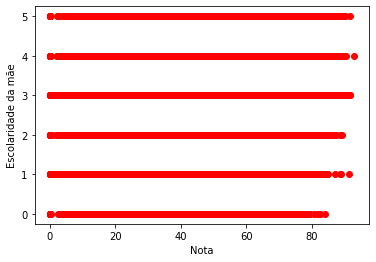

In [22]:
#Escolaridade da mae
plt.scatter( tabela.NT_GER, tabela.QE_I05, c = 'red')
plt.xlabel('Nota')
plt.ylabel('Escolaridade da mãe')
plt.show()

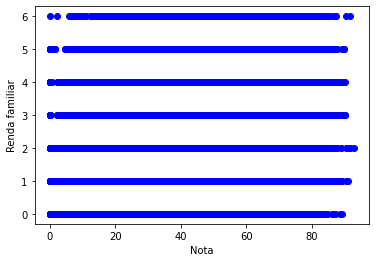

In [23]:
#Renda familiar
plt.scatter( tabela.NT_GER, tabela.QE_I08, c = 'blue')
plt.xlabel('Nota')
plt.ylabel('Renda familiar')
plt.show()

<AxesSubplot:title={'center':'NT_GER'}, xlabel='[QE_I08]'>

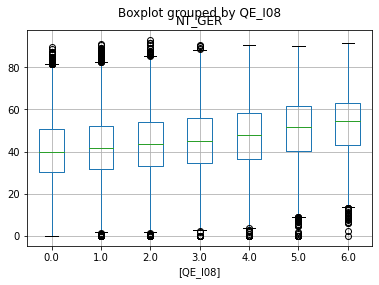

In [24]:
rendaFam= pd.DataFrame(tabela, columns=['NT_GER', 'QE_I08'])
rendaFam.boxplot(by='QE_I08')

<AxesSubplot:title={'center':'NT_GER'}, xlabel='[QE_I02]'>

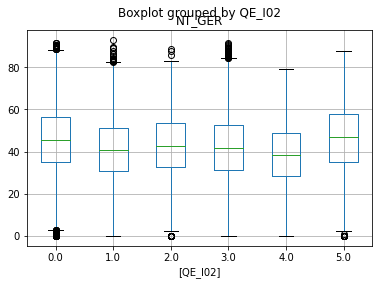

In [25]:
cor= pd.DataFrame(tabela, columns=['NT_GER', 'QE_I02'])
cor.boxplot(by='QE_I02')

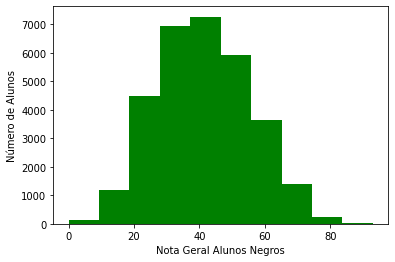

In [26]:
plt.hist(negros['NT_GER'], color = 'green')
plt.xlabel('Nota Geral Alunos Negros')
plt.ylabel('Número de Alunos')
plt.show()

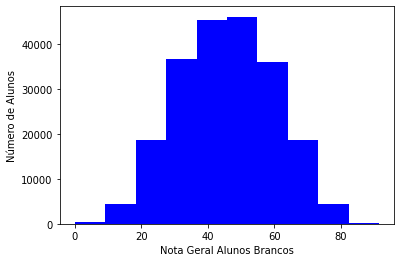

In [27]:
plt.hist(brancos['NT_GER'], color = 'blue')
plt.xlabel('Nota Geral Alunos Brancos')
plt.ylabel('Número de Alunos')
plt.show()

In [28]:
enade2018= pd.read_csv("microdados_enade_2018.txt", sep=';',dtype={"QE_I02": 'category', 
                                                                               'QE_I05':'category',
                                                                              'QE_I08':'category',
                                                                              'QE_I17':'category',
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                               })


enade2018.shape

(548127, 137)

In [29]:
enade2018['QE_I02 - Grupos Cor Pele'] = enade2018['QE_I02'].cat.codes
enade2018['QE_I05 - Grupos Escolaridade Mae'] = enade2018['QE_I05'].cat.codes
enade2018['QE_I08 - Grupos Renda Familiar'] = enade2018['QE_I08'].cat.codes
enade2018['QE_I17 - Grupos Tipo Escola E.M'] = enade2018['QE_I17'].cat.codes

In [30]:
tabela2 = pd.DataFrame(enade2018, columns=['QE_I02 - Grupos Cor Pele','QE_I02', 'QE_I05', 'QE_I08','QE_I17', 'NT_GER'])
tabela2.head(10)

,QE_I02 - Grupos Cor Pele,QE_I02,QE_I05,QE_I08,QE_I17,NT_GER
0,3,D,D,C,A,"42,8"
1,0,A,B,D,A,"59,3"
2,0,A,D,E,A,"60,9"
3,0,A,D,D,A,25
4,1,B,C,E,A,"42,4"
5,0,A,D,F,A,40
6,0,A,F,E,A,"55,1"
7,0,A,D,C,A,"38,7"
8,0,A,C,B,A,50
9,3,D,C,C,A,"50,6"


In [31]:
from collections import Counter
Counter(tabela2['QE_I02']).values()

Counter(tabela2['QE_I02']).keys()


dict_keys(['D', 'A', 'B', 'E', nan, 'C', 'F'])

In [32]:
tabela2['NT_GER'] = tabela2['NT_GER'].str.replace(',', '.')
tabela2=tabela2.loc[(tabela2['NT_GER'].notnull())]
tabela2=tabela2.loc[(tabela2['QE_I02'].notnull())]
tabela2=tabela2.loc[(tabela2['QE_I02 - Grupos Cor Pele'].notnull())]


tabela2=tabela2.loc[(tabela2['QE_I02 - Grupos Cor Pele'].notnull())]
tabela2['QE_I02 - Grupos Cor Pele'].dropna(how='any')
tabela2['QE_I02'].dropna(how='any')

tabela2['NT_GER'].dropna(how='any')





#converte de str para float
tabela2['NT_GER'] = pd.to_numeric(tabela2['NT_GER'])
print(tabela2['NT_GER'])
#media das notas gerais
print(tabela2['NT_GER'].mean())


0         42.8
1         59.3
2         60.9
3         25.0
4         42.4
          ... 
548112    59.0
548114    47.8
548115    32.0
548117    32.8
548120    35.1
Name: NT_GER, Length: 459698, dtype: float64
41.81778384939677


In [33]:
Counter(tabela2['QE_I02 - Grupos Cor Pele']).values()
Counter(tabela2['QE_I02 - Grupos Cor Pele']).keys()

dict_keys([3, 0, 1, 4, 2, 5])

In [34]:
tabela2['QE_I02'].value_counts()

A    247943
D    149599
B     41535
C     10856
F      8395
E      1370
Name: QE_I02, dtype: int64

In [35]:
tabela2['QE_I02 - Grupos Cor Pele'].value_counts()



0    247943
3    149599
1     41535
2     10856
5      8395
4      1370
Name: QE_I02 - Grupos Cor Pele, dtype: int64

In [36]:
negros2 = tabela2[tabela2['QE_I02'] == 'B']
print(negros2)
negros2.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
4                              1      B      C      E      A    42.4
16                             1      B      D      B      A    36.4
29                             1      B      C      C      A    45.4
36                             1      B      C      E      A    46.5
41                             1      B      C      C      A    50.5
...                          ...    ...    ...    ...    ...     ...
548019                         1      B      E      G      B    47.0
548029                         1      B      D      E      E    42.4
548035                         1      B      D      C      A    37.9
548038                         1      B      D      D      E    16.3
548045                         1      B      D      C      A    56.0

[41535 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,41535.0,41535.000000
mean,1.0,41.007926
std,0.0,14.084442
min,1.0,0.000000
25%,1.0,30.800000
50%,1.0,40.200000
75%,1.0,50.600000
max,1.0,91.200000


In [37]:
brancos2 = tabela2[tabela2['QE_I02'] == 'A']
print(brancos2)
brancos2.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
1                              0      A      B      D      A    59.3
2                              0      A      D      E      A    60.9
3                              0      A      D      D      A    25.0
5                              0      A      D      F      A    40.0
6                              0      A      F      E      A    55.1
...                          ...    ...    ...    ...    ...     ...
548105                         0      A      D      B      E    11.5
548111                         0      A      D      D      B    26.5
548112                         0      A      A      A      A    59.0
548117                         0      A      C      F      A    32.8
548120                         0      A      B      B      A    35.1

[247943 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,247943.0,247943.000000
mean,0.0,42.970851
std,0.0,14.579095
min,0.0,0.000000
25%,0.0,32.300000
50%,0.0,42.300000
75%,0.0,53.200000
max,0.0,92.800000


In [38]:
pardos2 = tabela2[tabela2['QE_I02'] == 'D']
print(pardos2)
pardos2.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
0                              3      D      D      C      A    42.8
9                              3      D      C      C      A    50.6
13                             3      D      B      C      A    42.1
17                             3      D      B      D      A    38.9
42                             3      D      C      C      A    22.5
...                          ...    ...    ...    ...    ...     ...
548082                         3      D      C      C      A    40.5
548084                         3      D      B      B      A    18.7
548088                         3      D      D      A      A    39.2
548091                         3      D      D      C      A    26.0
548115                         3      D      D      B      A    32.0

[149599 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,149599.0,149599.000000
mean,3.0,40.132649
std,0.0,13.916990
min,3.0,0.000000
25%,3.0,30.000000
50%,3.0,39.200000
75%,3.0,49.500000
max,3.0,93.700000


In [39]:
ecolaridadeMaeNenhuma2 = tabela2[tabela2['QE_I05'] == 'A']
print(ecolaridadeMaeNenhuma2)
ecolaridadeMaeNenhuma2.describe()


        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
60                             3      D      A      E      A    45.5
72                             0      A      A      E      A    67.6
158                            0      A      A      B      A    35.4
173                            0      A      A      A      A    52.8
177                            0      A      A      A      A    38.3
...                          ...    ...    ...    ...    ...     ...
547927                         0      A      A      A      A    29.2
548015                         0      A      A      A      A    44.7
548024                         0      A      A      A      A    44.7
548044                         0      A      A      A      A    26.3
548112                         0      A      A      A      A    59.0

[27852 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,27852.000000,27852.000000
mean,1.005852,39.408247
std,1.393600,14.077630
min,0.000000,0.000000
25%,0.000000,29.100000
50%,0.000000,38.300000
75%,3.000000,48.900000
max,5.000000,90.400000


In [40]:
ecolaridadeMaePos2 = tabela2[tabela2['QE_I05'] == 'F']
print(ecolaridadeMaePos2)
ecolaridadeMaePos2.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
6                              0      A      F      E      A    55.1
12                             0      A      F      D      A    43.5
30                             0      A      F      D      A    52.4
44                             0      A      F      B      B    22.6
61                             0      A      F      B      A    25.1
...                          ...    ...    ...    ...    ...     ...
548025                         0      A      F      F      B    40.6
548057                         3      D      F      F      B    43.6
548058                         0      A      F      F      D    22.6
548069                         0      A      F      D      A    15.7
548078                         3      D      F      C      D    36.9

[36579 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,36579.000000,36579.000000
mean,0.961699,46.730050
std,1.434762,15.321254
min,0.000000,0.000000
25%,0.000000,35.600000
50%,0.000000,46.700000
75%,3.000000,58.000000
max,5.000000,93.700000


In [41]:
estudouEscPublica2 = tabela2[tabela2['QE_I17'] == 'A']
print(estudouEscPublica2)
estudouEscPublica2.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
0                              3      D      D      C      A    42.8
1                              0      A      B      D      A    59.3
2                              0      A      D      E      A    60.9
3                              0      A      D      D      A    25.0
4                              1      B      C      E      A    42.4
...                          ...    ...    ...    ...    ...     ...
548097                         0      A      D      E      A    29.7
548112                         0      A      A      A      A    59.0
548115                         3      D      D      B      A    32.0
548117                         0      A      C      F      A    32.8
548120                         0      A      B      B      A    35.1

[308368 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,308368.000000,308368.000000
mean,1.323007,40.347948
std,1.461517,13.802317
min,0.000000,0.000000
25%,0.000000,30.300000
50%,1.000000,39.500000
75%,3.000000,49.700000
max,5.000000,92.800000


In [42]:
estudouEscParticular2 = tabela2[tabela2['QE_I17'] == 'B']
print(estudouEscParticular2)
estudouEscParticular2.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
21                             0      A      D      G      B    51.5
33                             0      A      E      G      B    49.6
44                             0      A      F      B      B    22.6
56                             0      A      D      F      B    35.5
64                             3      D      D      F      B    82.8
...                          ...    ...    ...    ...    ...     ...
548040                         0      A      D      C      B    44.3
548057                         3      D      F      F      B    43.6
548081                         3      D      D      F      B    27.7
548096                         0      A      D      E      B    33.4
548111                         0      A      D      D      B    26.5

[108793 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,108793.000000,108793.000000
mean,0.924582,46.426158
std,1.411495,15.073678
min,0.000000,0.000000
25%,0.000000,35.500000
50%,0.000000,46.400000
75%,3.000000,57.400000
max,5.000000,93.700000


In [43]:
estudouExterior2 = tabela2[tabela2['QE_I17'] == 'C']
print(estudouExterior2)
estudouExterior2.describe()

        QE_I02 - Grupos Cor Pele QE_I02 QE_I05 QE_I08 QE_I17  NT_GER
4490                           2      C      D      B      C    49.0
7333                           2      C      E      E      C    56.5
8919                           5      F      E      C      C    65.9
10339                          5      F      D      A      C    49.2
11174                          0      A      E      F      C    27.5
...                          ...    ...    ...    ...    ...     ...
541420                         0      A      F      F      C    44.2
541723                         0      A      D      B      C    24.3
543754                         3      D      C      C      C    48.4
545772                         1      B      C      B      C    39.7
546466                         2      C      E      F      C    41.2

[469 rows x 6 columns]


,QE_I02 - Grupos Cor Pele,NT_GER
count,469.000000,469.000000
mean,1.243070,43.857783
std,1.510851,15.066125
min,0.000000,7.000000
25%,0.000000,33.100000
50%,1.000000,43.200000
75%,2.000000,54.300000
max,5.000000,83.000000


In [44]:
tabela2['QE_I02'] = tabela2['QE_I02'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5})
tabela2['QE_I05'] = tabela2['QE_I05'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5})
tabela2['QE_I08'] = tabela2['QE_I08'].map({'A': 0, 'B': 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})


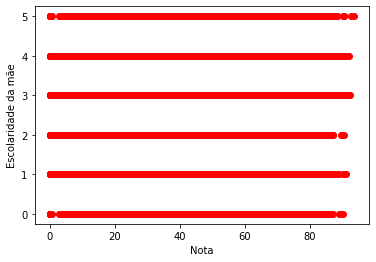

In [45]:
#Escolaridade da mae
plt.scatter( tabela2.NT_GER, tabela2.QE_I05, c = 'red')
plt.xlabel('Nota')
plt.ylabel('Escolaridade da mãe')
plt.show()

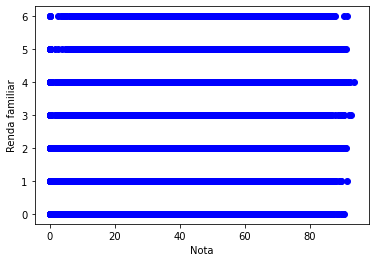

In [46]:
#Renda familiar
plt.scatter( tabela2.NT_GER, tabela2.QE_I08, c = 'blue')
plt.xlabel('Nota')
plt.ylabel('Renda familiar')
plt.show()

<AxesSubplot:title={'center':'NT_GER'}, xlabel='[QE_I08]'>

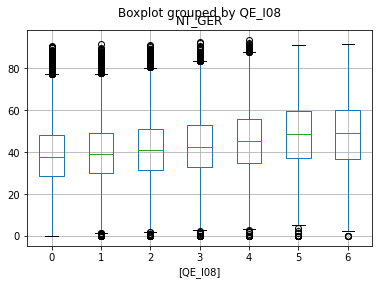

In [47]:
rendaFam2= pd.DataFrame(tabela2, columns=['NT_GER', 'QE_I08'])
rendaFam2.boxplot(by='QE_I08')

<AxesSubplot:title={'center':'NT_GER'}, xlabel='[QE_I02]'>

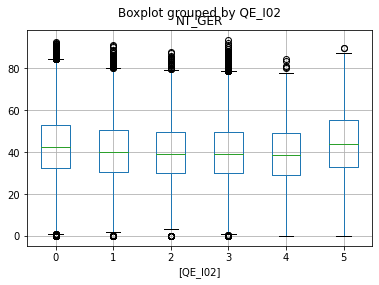

In [48]:
cor2= pd.DataFrame(tabela2, columns=['NT_GER', 'QE_I02'])
cor2.boxplot(by='QE_I02')

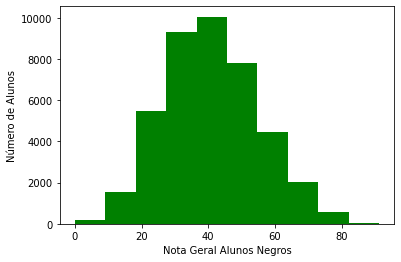

In [49]:
plt.hist(negros2['NT_GER'], color = 'green')
plt.xlabel('Nota Geral Alunos Negros')
plt.ylabel('Número de Alunos')
plt.show()

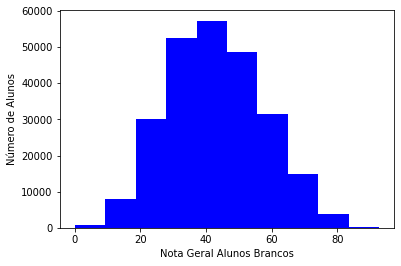

In [50]:
plt.hist(brancos2['NT_GER'], color = 'blue')
plt.xlabel('Nota Geral Alunos Brancos')
plt.ylabel('Número de Alunos')
plt.show()

In [52]:
#REgressão dados 2019
from sklearn.model_selection import train_test_split
import time
from sklearn import linear_model

from sklearn.datasets import load_boston # para carregar os dados from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o modelo

X1 = tabela['QE_I02 - Grupos Cor Pele']
y1 = tabela['NT_GER']


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.50, random_state=42)

pd.get_dummies(X1_train)


X1_train = X1_train.array.to_numpy().reshape(-1,1)
X1_test = X1_test.array.to_numpy().reshape(-1,1)


y1_test = y1_test.array.to_numpy().reshape(-1,1)


regr1 = LinearRegression() # cria o modelo 
regr1.fit(X1_train, y1_train) # treina o modelo

#r2_train1 = regr.score(X1_train, y1_train)
#r2_test1 = regr.score(X1_test, y1_test)

#print('R2 no set de treino: %.2f' % r2_train1)
#print('R2 no set de teste: %.2f' % r2_test1)



LinearRegression()

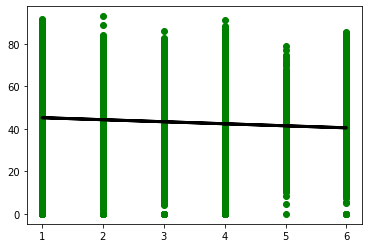

In [53]:
#1 - Branco
#2 - Preto
#3 - Amarela
#4 - Pardo
#5 - Indígena
#6 - Não declarado

corPele_y_pred1 = regr1.predict(X1_test)


plt.scatter(X1_test,y1_test,  color='green')
plt.plot(X1_test, corPele_y_pred1, color='black', linewidth=3)


In [ ]:
#Calculando o erro médio
print('Erro médio: ', sum(abs(y1_test-corPele_y_pred1.reshape(-1,1))))

In [54]:
#REgressão dados 2018
X = tabela2['QE_I02 - Grupos Cor Pele']
y = tabela2['NT_GER']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

pd.get_dummies(X_train)

X_train = X_train.array.to_numpy().reshape(-1,1)
X_test = X_test.array.to_numpy().reshape(-1,1)

y_test = y_test.array.to_numpy().reshape(-1,1)


regr = LinearRegression() # cria o modelo 
regr.fit(X_train, y_train) # treina o modelo

#r2_train = regr.score(X_train, y_train)
#r2_test = regr.score(X_test, y_test)

#print('R2 no set de treino: %.2f' % r2_train)
#print('R2 no set de teste: %.2f' % r2_test)


LinearRegression()

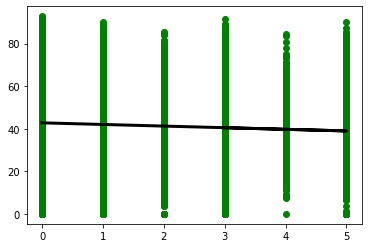

In [55]:
#0 - Branco
#1 - Preto
#2 - Amarela
#3 - Pardo
#4 - Indígena
#5 - Não declarado

corPele_y_pred = regr.predict(X_test)


plt.scatter(X_test,y_test,  color='green')
plt.plot(X_test, corPele_y_pred, color='black', linewidth=3)

In [56]:
#Calculando o erro médio
print('Erro médio: ', sum(abs(y_test-corPele_y_pred.reshape(-1,1))))

Erro médio:  [2687162.93137529]


In [57]:
#Classificação: 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics # analisa a acurácia de nossos modelos


#X3 = tabela['grupo_nota']

X3 = tabela['NT_GER']
y3 = tabela['QE_I02 - Grupos Cor Pele']


X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=42)


X3_train = X3_train.array.to_numpy().reshape(-1,1)
X3_test = X3_test.array.to_numpy().reshape(-1,1)

y3_test = y3_test.array.to_numpy().reshape(-1,1)



# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X3_train, y3_train)

# Fazer previsões
preds = gnb.predict(X3_test)
#print(preds)

# Avaliar a precisão
acc_gaussian=round(metrics.accuracy_score(preds,y3_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian,"% de acurácia")


54.2 % de acurácia


In [58]:
X4 = tabela2['NT_GER']
y4 = tabela2['QE_I02 - Grupos Cor Pele']


X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.33, random_state=42)


X4_train = X4_train.array.to_numpy().reshape(-1,1)
X4_test = X4_test.array.to_numpy().reshape(-1,1)

y4_test = y4_test.array.to_numpy().reshape(-1,1)



# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X4_train, y4_train)

# Fazer previsões
preds1 = gnb.predict(X4_test)
#print(preds)

# Avaliar a precisão
acc_gaussian1=round(metrics.accuracy_score(preds1,y4_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian1,"% de acurácia")

54.0 % de acurácia


In [74]:
Counter(tabela['QE_I17 - Grupos Tipo Escola E.M']).values()
Counter(tabela['QE_I17 - Grupos Tipo Escola E.M']).keys()

dict_keys([2, 1, 5, 4, 6, 3, 0])

In [75]:
tabela.drop(tabela.loc[tabela['QE_I17 - Grupos Tipo Escola E.M']==' '].index, inplace=True)


In [92]:

tabela=tabela.loc[(tabela['QE_I17 - Grupos Tipo Escola E.M'].notnull())]
tabela['QE_I17 - Grupos Tipo Escola E.M'].dropna(how='any')



X5 = tabela[['NT_GER', 'QE_I17 - Grupos Tipo Escola E.M']]
y5 = tabela['QE_I02 - Grupos Cor Pele']


X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.33, random_state=42)


# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X5_train, y5_train)

# Fazer previsões
preds5 = gnb.predict(X5_test)
#print(preds)

# Avaliar a precisão
acc_gaussian5=round(metrics.accuracy_score(preds5,y5_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian5,"% de acurácia")



54.5 % de acurácia


In [93]:
Counter(tabela['QE_I08 - Grupos Renda Familiar']).values()
Counter(tabela['QE_I08 - Grupos Renda Familiar']).keys()

dict_keys([2, 5, 3, 4, 6, 7, 1, 0])

In [95]:
tabela.drop(tabela.loc[tabela['QE_I08 - Grupos Renda Familiar']==' '].index, inplace=True)


In [96]:

tabela=tabela.loc[(tabela['QE_I08 - Grupos Renda Familiar'].notnull())]
tabela['QE_I08 - Grupos Renda Familiar'].dropna(how='any')



X6 = tabela[['NT_GER', 'QE_I08 - Grupos Renda Familiar']]
y6 = tabela['QE_I02 - Grupos Cor Pele']


X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.33, random_state=42)


# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X6_train, y6_train)

# Fazer previsões
preds6 = gnb.predict(X6_test)
#print(preds)

# Avaliar a precisão
acc_gaussian6=round(metrics.accuracy_score(preds6,y6_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian6,"% de acurácia")


55.6 % de acurácia


In [100]:


Counter(tabela['QE_I05 - Grupos Escolaridade Mae']).values()
Counter(tabela['QE_I05 - Grupos Escolaridade Mae']).keys()

dict_keys([5, 4, 6, 2, 3, 1, 0])

In [101]:
tabela.drop(tabela.loc[tabela['QE_I05 - Grupos Escolaridade Mae']==' '].index, inplace=True)


In [103]:

tabela=tabela.loc[(tabela['QE_I05 - Grupos Escolaridade Mae'].notnull())]
tabela['QE_I05 - Grupos Escolaridade Mae'].dropna(how='any')



X7 = tabela[['NT_GER', 'QE_I05 - Grupos Escolaridade Mae']]
y7 = tabela['QE_I02 - Grupos Cor Pele']


X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.33, random_state=42)


# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X7_train, y7_train)

# Fazer previsões
preds7 = gnb.predict(X7_test)
#print(preds)

# Avaliar a precisão
acc_gaussian7=round(metrics.accuracy_score(preds7,y7_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian7,"% de acurácia")


54.6 % de acurácia


In [104]:


X8 = tabela[['NT_GER', 'QE_I05 - Grupos Escolaridade Mae','QE_I08 - Grupos Renda Familiar' ]]
y8 = tabela['QE_I02 - Grupos Cor Pele']


X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.33, random_state=42)


# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X8_train, y8_train)

# Fazer previsões
preds8 = gnb.predict(X8_test)
#print(preds)

# Avaliar a precisão
acc_gaussian8=round(metrics.accuracy_score(preds8,y8_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian8,"% de acurácia")


55.1 % de acurácia
